To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Bipartite (Cardinality) Matching Problem

In this tutorial, the Python library "NetworkX" is required to solve the bipartite matching problem. 

In [2]:
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite

# Problem 02

An organization company wants to assign its own staff to work on an event it will organize. The jobs needed for the event and the suitability of the staff for these jobs have been determined. Each staff can be assigned to only one job. It is planned to make assignments in such a way that the minimum number of external personnel is needed. 

| Staff no | Job no |
| :------: | :----: |
| 0 | I,II,III,IV |
| 1 | I,II,IV |
| 2 | III,V |
| 3 | V |
| 4 | III |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("0", {"color": "black"}),
    ("1", {"color": "black"}),
    ("2", {"color": "black"}),
    ("3", {"color": "black"}),
    ("4", {"color": "black"}),
    ("I", {"color": "black"}),
    ("II", {"color": "black"}),
    ("III", {"color": "black"}),
    ("IV", {"color": "black"}),
    ("V", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "0":np.array([0.0,4.0]),
    "1":np.array([0.0,3.0]),
    "2":np.array([0.0,2.0]),
    "3":np.array([0.0,1.0]),
    "4":np.array([0.0,0.0]),
    "I":np.array([1.0,4.0]),
    "II":np.array([1.0,3.0]),
    "III":np.array([1.0,2.0]),
    "IV":np.array([1.0,1.0]),
    "V":np.array([1.0,0.0])
}

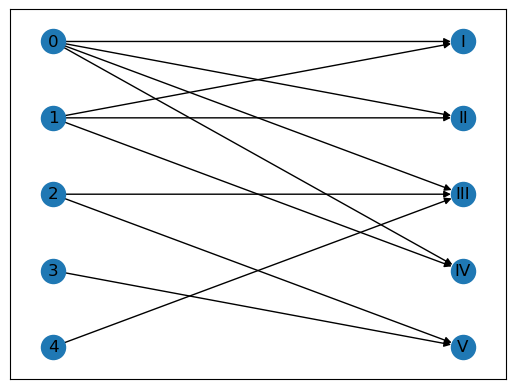

In [5]:
elist = [("0", "I"),
         ("0", "II"),
         ("0", "III"),
         ("0", "IV"),
         ("1", "I"),
         ("1", "II"),
         ("1", "IV"),
         ("2", "III"),
         ("2", "V"),
         ("3", "V"),
         ("4", "III")]
G1.add_edges_from(elist)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 10 nodes and 11 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (1, 5)	1
  (1, 6)	1
  (1, 8)	1
  (2, 7)	1
  (2, 9)	1
  (3, 9)	1
  (4, 7)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 0 0 0 0 1 1 1 1 0]
 [0 0 0 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [9]:
maxmatching = bipartite.maximum_matching(G1, top_nodes=None)
print(maxmatching)

{'1': 'I', '0': 'II', '4': 'III', '3': 'V', 'II': '0', 'I': '1', 'III': '4', 'V': '3'}
